<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-del-projecto-team_109/blob/main/proyecto_final_entrega2_team109.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Maestría en Inteligencia Artificial Aplicada**
## Proyecto Final **Aguas Subterraneas** - Entrega 2
#### <BR>
### **A01794067 - Jose Antonio Mendoza Castro**
### **A00642541 - Miguel Angel Aguilera Rodríguez**
#### <BR>
### **Ciencia y analitica de datos**
### **Dra. Maria de la Paz Rico**
### 2022-11-18

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [84]:
import warnings
warnings.filterwarnings('ignore')

In [88]:
from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold, cross_validate, GridSearchCV

from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [4]:
pd.set_option('display.max_columns', None)

In [5]:
df = pd.read_csv('Datos_de_calidad_del_agua_de_sitios_de_monitoreo_de_aguas_subterraneas_2020.csv', encoding = 'latin-1')

### **Limpieza de los datos**

In [6]:
df.isnull().sum()

CLAVE                      0
SITIO                      0
ORGANISMO_DE_CUENCA        0
ESTADO                     0
MUNICIPIO                  0
ACUIFERO                   0
SUBTIPO                    0
LONGITUD                   0
LATITUD                    0
PERIODO                    0
ALC_mg/L                   4
CALIDAD_ALC                4
CONDUCT_mS/cm              6
CALIDAD_CONDUC             6
SDT_mg/L                1068
SDT_M_mg/L                 2
CALIDAD_SDT_ra             2
CALIDAD_SDT_salin          2
FLUORUROS_mg/L             0
CALIDAD_FLUO               0
DUR_mg/L                   1
CALIDAD_DUR                1
COLI_FEC_NMP/100_mL        0
CALIDAD_COLI_FEC           0
N_NO3_mg/L                 1
CALIDAD_N_NO3              1
AS_TOT_mg/L                0
CALIDAD_AS                 0
CD_TOT_mg/L                0
CALIDAD_CD                 0
CR_TOT_mg/L                0
CALIDAD_CR                 0
HG_TOT_mg/L                0
CALIDAD_HG                 0
PB_TOT_mg/L   

In [7]:
#Dado que la columna 'SDT_mg/L' no tiene datos se decide por eliminarla.
df.drop(columns = ['SDT_mg/L'], inplace = True)

In [8]:
#Las filas de las columnas con a lo más 6 datos faltantes se eliminan.
#Dado que se considera que la base de datos contiene el número suficiente de datos para estimar un modelo.
columns = ['ALC_mg/L', 'CALIDAD_ALC', 'CONDUCT_mS/cm', 'CALIDAD_CONDUC', 'SDT_M_mg/L', 'CALIDAD_SDT_ra', 'CALIDAD_SDT_salin', 'DUR_mg/L', 'CALIDAD_DUR', 'N_NO3_mg/L', 'CALIDAD_N_NO3']
df.dropna(subset = columns, inplace = True)

In [9]:
#Volvemos a verificar los datos faltantes.
df.isnull().sum()

CLAVE                     0
SITIO                     0
ORGANISMO_DE_CUENCA       0
ESTADO                    0
MUNICIPIO                 0
ACUIFERO                  0
SUBTIPO                   0
LONGITUD                  0
LATITUD                   0
PERIODO                   0
ALC_mg/L                  0
CALIDAD_ALC               0
CONDUCT_mS/cm             0
CALIDAD_CONDUC            0
SDT_M_mg/L                0
CALIDAD_SDT_ra            0
CALIDAD_SDT_salin         0
FLUORUROS_mg/L            0
CALIDAD_FLUO              0
DUR_mg/L                  0
CALIDAD_DUR               0
COLI_FEC_NMP/100_mL       0
CALIDAD_COLI_FEC          0
N_NO3_mg/L                0
CALIDAD_N_NO3             0
AS_TOT_mg/L               0
CALIDAD_AS                0
CD_TOT_mg/L               0
CALIDAD_CD                0
CR_TOT_mg/L               0
CALIDAD_CR                0
HG_TOT_mg/L               0
CALIDAD_HG                0
PB_TOT_mg/L               0
CALIDAD_PB                0
MN_TOT_mg/L         

In [10]:
#Ahora hay columnas que contienen el símbolo '<'.
cols_to_replace = ['SDT_M_mg/L', 'FLUORUROS_mg/L', 'DUR_mg/L', 'COLI_FEC_NMP/100_mL', 'N_NO3_mg/L', 'AS_TOT_mg/L', 'CD_TOT_mg/L', 'CR_TOT_mg/L', 'HG_TOT_mg/L', 'PB_TOT_mg/L', 'MN_TOT_mg/L', 'FE_TOT_mg/L']

In [11]:
#Por lo que serán columnas a las que se les haga un reemplazo de esos valores por valores numéricos.
for col in cols_to_replace:
  df[col] = df[col].astype(str)

In [12]:
#Identificamos los valores con el símbolo '<'.
dict_tmp = {}

for col in cols_to_replace:
  list_tmp = list(df[df[col].str.contains('<')][col].unique())
  dict_tmp[col] = list_tmp

In [13]:
dict_tmp

{'SDT_M_mg/L': [],
 'FLUORUROS_mg/L': ['<0.2'],
 'DUR_mg/L': ['<20'],
 'COLI_FEC_NMP/100_mL': ['<1.1'],
 'N_NO3_mg/L': ['<0.02'],
 'AS_TOT_mg/L': ['<0.01'],
 'CD_TOT_mg/L': ['<0.003'],
 'CR_TOT_mg/L': ['<0.005'],
 'HG_TOT_mg/L': ['<0.0005'],
 'PB_TOT_mg/L': ['<0.005'],
 'MN_TOT_mg/L': ['<0.0015'],
 'FE_TOT_mg/L': ['<0.025']}

In [14]:
#Una vez identificados esos valores se procede a reemplazarlos por valores numéricos.
df['FLUORUROS_mg/L'] = df['FLUORUROS_mg/L'].replace('<0.2', 0.19) 
df['DUR_mg/L'] = df['DUR_mg/L'].replace('<20', 19)
df['COLI_FEC_NMP/100_mL'] = df['COLI_FEC_NMP/100_mL'].replace('<1.1', 1)
df['N_NO3_mg/L'] = df['N_NO3_mg/L'].replace('<0.02', 0.019)
df['AS_TOT_mg/L'] = df['AS_TOT_mg/L'].replace('<0.01', 0.009)
df['CD_TOT_mg/L'] = df['CD_TOT_mg/L'].replace('<0.003', 0.002)
df['CR_TOT_mg/L'] = df['CR_TOT_mg/L'].replace('<0.005', 0.004)
df['HG_TOT_mg/L'] = df['HG_TOT_mg/L'].replace('<0.0005', 0.0004)
df['PB_TOT_mg/L'] = df['PB_TOT_mg/L'].replace('<0.005', 0.004)
df['MN_TOT_mg/L'] = df['MN_TOT_mg/L'].replace('<0.0015', 0.0014)
df['FE_TOT_mg/L'] = df['FE_TOT_mg/L'].replace('<0.025', 0.024)

In [15]:
#Aseguramos que las columnas a las que les aplicamos el reemplazo vuelvan hacer completamente numéricas.
for col in cols_to_replace:
  df[col] = df[col].fillna(0).astype(float)

### **Variables dependientes X y dependiente Y**



In [20]:
#Seleccionamos un grupo de variables para considerar en primera instancia y después aplicarles el 'feature importance'.
columns = ['LONGITUD', 'LATITUD', 'ALC_mg/L', 'CONDUCT_mS/cm', 'SDT_M_mg/L', 'FLUORUROS_mg/L', 'DUR_mg/L', 'COLI_FEC_NMP/100_mL', 'N_NO3_mg/L', 'AS_TOT_mg/L', 'CD_TOT_mg/L', 'CR_TOT_mg/L', 'HG_TOT_mg/L',
           'PB_TOT_mg/L', 'MN_TOT_mg/L', 'FE_TOT_mg/L']

In [21]:
X = df[columns].copy()

In [22]:
Y = df['SEMAFORO'].copy()

In [23]:
Y = Y.map({'Rojo': 1, 'Amarillo': 2, 'Verde': 3})

In [24]:
#Distribución de la variable objetivo.
#Si bien la variable no está balanceada tampoco se considera un desbalance extremo que pueda afectar el desempeño óptimo de algún modelo.
Y.value_counts()

3    427
1    382
2    245
Name: SEMAFORO, dtype: int64

### **Feature Importance**

### Decision Tree

In [25]:
dt_clf = DecisionTreeClassifier(random_state = 42)

In [26]:
dt_clf.fit(X, Y)

DecisionTreeClassifier(random_state=42)

In [28]:
dict_feat_imp = {}

for name, score in zip(X.columns, dt_clf.feature_importances_):
    dict_feat_imp[name] = score

In [34]:
df_feat_imp = pd.DataFrame.from_dict(dict_feat_imp, orient = 'index')

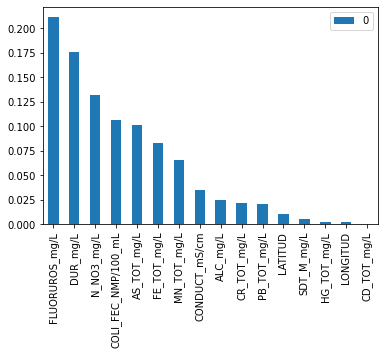

In [39]:
df_feat_imp.sort_values(by = [0], ascending = False).plot.bar()
plt.show()

In [47]:
df_feat_imp.sort_values(by = [0], ascending = False, inplace = True)
df_feat_imp['cum'] = df_feat_imp[0].cumsum()

In [48]:
df_feat_imp

,0,cum
FLUORUROS_mg/L,0.205219,0.205219
DUR_mg/L,0.124111,0.329331
AS_TOT_mg/L,0.105906,0.435236
N_NO3_mg/L,0.101203,0.536440
COLI_FEC_NMP/100_mL,0.085088,0.621527
FE_TOT_mg/L,0.075116,0.696643
MN_TOT_mg/L,0.071189,0.767832
SDT_M_mg/L,0.061675,0.829507
CONDUCT_mS/cm,0.058278,0.887786
ALC_mg/L,0.030180,0.917966


### **Selección de las variables de mayor importancia**

In [50]:
#Dado el análisis anterior se tomarán las variables hasta donde se acumula un 80%
cols_most_imp = ['FLUORUROS_mg/L', 'DUR_mg/L', 'AS_TOT_mg/L', 'N_NO3_mg/L', 'COLI_FEC_NMP/100_mL', 'FE_TOT_mg/L', 'MN_TOT_mg/L', 'SDT_M_mg/L']

### **Clasificador**

In [51]:
X = df[cols_most_imp].copy()

In [53]:
Xtv, Xtest, Ytv, Ytest = train_test_split(X, Y, test_size = 0.2, random_state = 42)

In [61]:
pipe = Pipeline(steps = [('scaler', MinMaxScaler(feature_range=(1,2))),
                          ('lg', FunctionTransformer(np.log))])

column_transformer = ColumnTransformer(transformers = [('pipe', pipe, cols_most_imp)],
                                       remainder='passthrough')

In [81]:
#Se considerarán dos modelos para comparar, Decision Tree y Random Forest.
def get_models():

  modelos, nombres = list(), list()

  # DT 
  modelos.append(DecisionTreeClassifier())
  nombres.append('DT')

  # RF 
  modelos.append(RandomForestClassifier())
  nombres.append('RF')
  
  
  return modelos, nombres

In [68]:
models, names = get_models()

In [80]:
results = list()

for i in range(len(models)):
  pipeline = Pipeline(steps = [('pipe', pipe), 
                               ('m', models[i])])
  
  cv = RepeatedStratifiedKFold(n_splits = 5, n_repeats = 3, random_state = 42) 

  scores = cross_validate(pipeline, Xtv, Ytv, scoring = 'accuracy', cv = cv, return_train_score = True)

  results.append(scores)

  print(names[i] + ':', np.mean(scores['test_score']), '(', np.std(scores['test_score']),')')

DT: 0.9122123602892835 ( 0.019139186217197655 )
RF: 0.9466140696909927 ( 0.021313138508280753 )


Dado los resultados anteriores a partir de la métrica accuracy se decide utilizar el modelo Random Forest como mejor clasificador. Por último, buscamos los mejores hiperparámetros para el modelo.

In [85]:
cv = RepeatedStratifiedKFold(n_splits = 5, n_repeats = 3,random_state = 42)

pipeline = Pipeline(steps=[('ct',column_transformer),('m',models[1])])

param_grid = {
    'm__n_estimators': [10, 50, 100, 200],
    'm__criterion': ['gini', 'entropy', 'log_loss'],
    'm__max_depth': [None, 2, 4, 6],
    'm__min_samples_split': [2, 3, 4, 5, 6]
}

grid = GridSearchCV(estimator=pipeline,
                    param_grid=param_grid,
                    cv = cv,
                    scoring = 'accuracy')

grid.fit(Xtv, Ytv)

print('Mejor valor de accuracy obtenido:', grid.best_score_)
print('Mejor combinaciónhiperparámetros:', grid.best_params_)
print('Métrica utilizada:', grid.scoring)

Mejor valor de accuracy obtenido: 0.9537475345167653
Mejor combinaciónhiperparámetros: {'m__criterion': 'entropy', 'm__max_depth': None, 'm__min_samples_split': 3, 'm__n_estimators': 200}
Métrica utilizada: accuracy


### **Reporte de Clasificación**

In [86]:
pipeline = Pipeline(steps=[('ct',column_transformer), ('m', RandomForestClassifier(n_estimators = 200, criterion = 'entropy', max_depth = None, min_samples_split = 3, random_state = 42))])

pipeline.fit(Xtv, Ytv)

Pipeline(steps=[('ct',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipe',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler(feature_range=(1,
                                                                                               2))),
                                                                  ('lg',
                                                                   FunctionTransformer(func=<ufunc 'log'>))]),
                                                  ['FLUORUROS_mg/L', 'DUR_mg/L',
                                                   'AS_TOT_mg/L', 'N_NO3_mg/L',
                                                   'COLI_FEC_NMP/100_mL',
                                                   'FE_TOT_mg/L', 'MN_TOT_mg/L',
                                                   'SDT_M_mg/L'])])),
             

In [87]:
yhat = pipeline.predict(Xtest)

In [89]:
print(classification_report(Ytest, yhat, labels = [1, 2, 3]))

              precision    recall  f1-score   support

           1       0.97      0.97      0.97        69
           2       0.98      0.78      0.87        55
           3       0.87      0.98      0.92        87

    accuracy                           0.92       211
   macro avg       0.94      0.91      0.92       211
weighted avg       0.93      0.92      0.92       211



### **Matriz de confusión**

In [101]:
df_conf_mat = pd.DataFrame(confusion_matrix(Ytest, yhat))

Text(26.5, 0.5, 'Actual')

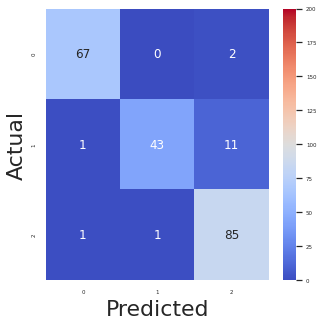

In [102]:
plt.figure(figsize = (5, 5))
sns.set(font_scale = .5)

sns.heatmap(df_conf_mat,
            cmap = 'coolwarm',
            annot = True,
            vmax = 200,
            annot_kws={"fontsize": 12})

plt.xlabel('Predicted', fontsize = 22)
plt.ylabel('Actual', fontsize = 22)

### **Conclusiones**

Por medio del análisis realizado encontramos una primer aproximación al problema planteado. Primero realizamos un análisis general de los datos de Aguas Subterraneas e identificamos algunos problemas en los datos como texto en columnas numéricas. Segundo visualizamos de manera general la importancia de las variables dadas, en este caso decidimos considerar sólo las variables numéricas relacionadas a la calidad del agua. Tercero, consideramos dos modelos para Decision Tree y Random Forest, a partir de estos y dado los resultados elegimos Decision Tree. En general consideramos que obtuvimos unos buenos resultados, con métricas cercanas a 0.8 o superiores.